### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import dataset

In [2]:
df = pd.read_csv("EO108_INTERNET-2020-1-EN-20210529T100253.csv")

/var/folders/ng/83h0md1s73567d977zch9wnh0000gn/T/ipykernel_52130/2124733860.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("EO108_INTERNET-2020-1-EN-20210529T100253.csv")


### Filter on time period, frequency data

In [3]:
freq = 'Quarterly'
time = ['Q1-1995', 'Q2-1995', 'Q3-1995', 'Q4-1995',
       'Q1-1996', 'Q2-1996', 'Q3-1996', 'Q4-1996', 'Q1-1997', 'Q2-1997',
       'Q3-1997', 'Q4-1997', 'Q1-1998', 'Q2-1998', 'Q3-1998', 'Q4-1998',
       'Q1-1999', 'Q2-1999', 'Q3-1999', 'Q4-1999', 'Q1-2000', 'Q2-2000',
       'Q3-2000', 'Q4-2000', 'Q1-2001', 'Q2-2001', 'Q3-2001', 'Q4-2001',
       'Q1-2002', 'Q2-2002', 'Q3-2002', 'Q4-2002', 'Q1-2003', 'Q2-2003',
       'Q3-2003', 'Q4-2003', 'Q1-2004', 'Q2-2004', 'Q3-2004', 'Q4-2004',
       'Q1-2005', 'Q2-2005', 'Q3-2005', 'Q4-2005', 'Q1-2006', 'Q2-2006',
       'Q3-2006', 'Q4-2006', 'Q1-2007', 'Q2-2007', 'Q3-2007', 'Q4-2007',
       'Q1-2008', 'Q2-2008', 'Q3-2008', 'Q4-2008', 'Q1-2009', 'Q2-2009',
       'Q3-2009', 'Q4-2009', 'Q1-2010', 'Q2-2010', 'Q3-2010', 'Q4-2010',
       'Q1-2011', 'Q2-2011', 'Q3-2011', 'Q4-2011', 'Q1-2012', 'Q2-2012',
       'Q3-2012', 'Q4-2012', 'Q1-2013', 'Q2-2013', 'Q3-2013', 'Q4-2013',
       'Q1-2014', 'Q2-2014', 'Q3-2014', 'Q4-2014', 'Q1-2015', 'Q2-2015',
       'Q3-2015', 'Q4-2015', 'Q1-2016', 'Q2-2016', 'Q3-2016', 'Q4-2016',
       'Q1-2017', 'Q2-2017', 'Q3-2017', 'Q4-2017', 'Q1-2018', 'Q2-2018',
       'Q3-2018', 'Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019', 'Q4-2019',
       'Q1-2020', 'Q2-2020', 'Q3-2020', 'Q4-2020']

df = df[df.Frequency == freq]
df = df[df.Time.isin(time)]

### Split data set on donor pool countries and USA

In [4]:
countries_donor = ['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland', 'France', 'Germany', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom']
countries_usa = ['United States']

In [5]:
df_donor = df[df.Country.isin(countries_donor)]
df_usa = df[df.Country.isin(countries_usa)]

### Variables we need 
I
1. GDP 
2. employment 
3. labour force

External validator 
1. unemployment rate

K 
1. GDP shares of consumption
2. investment
3. net exports 
4. labour productivity growth
5. average unemployment rate

In [6]:
variables = ['Gross domestic product, volume, market prices',
             'Total employment (labour force survey basis)',
             'Labour force',
             'Unemployment rate',
             'Private final consumption expenditure, volume',
             'Gross fixed capital formation, total, volume',
            'Exports of goods and services, volume (national accounts basis)',
            'Imports of goods and services, volume (national accounts basis)']

df_donor = df_donor[df_donor.Variable.isin(variables)]
df_usa = df_usa[df_usa.Variable.isin(variables)]

### Matching of covariates

In [7]:
df_cov_usa = pd.DataFrame.copy(df_usa)
df_cov_donor = pd.DataFrame.copy(df_donor)
times = ['Q3-2015', 'Q4-2015', 'Q1-2016', 'Q2-2016']

df_cov_usa = df_cov_usa[df_cov_usa.Time.isin(times)]
df_cov_donor = df_cov_donor[df_cov_donor.Time.isin(times)]

In [8]:
# # Consumption/GDP 69.0%
str_gdp = 'Gross domestic product, volume, market prices'
str_cons = 'Private final consumption expenditure, volume'
gdp = df_cov_usa[df_cov_usa.Variable == str_gdp].Value
cons = df_cov_usa[df_cov_usa.Variable == str_cons].Value

gdp = gdp.reset_index().Value
cons = cons.reset_index().Value
print(np.round(np.mean(cons/gdp*100),1))

68.9


In [9]:
# Investment/GDP 20.6%
str_investment = 'Gross fixed capital formation, total, volume'

investment = df_cov_usa[df_cov_usa.Variable == str_investment].Value

investment = investment.reset_index().Value
print(np.round(np.mean(investment/gdp*100),1))

20.6


In [10]:
# Net Exports/GDP −4.3%
str_exp = 'Exports of goods and services, volume (national accounts basis)'
str_imp = 'Imports of goods and services, volume (national accounts basis)'

exp = df_cov_usa[df_cov_usa.Variable == str_exp].Value
imp = df_cov_usa[df_cov_usa.Variable == str_imp].Value

exp = exp.reset_index().Value
imp = imp.reset_index().Value
net_exp = exp - imp

print(np.round(np.mean(net_exp/gdp*100),1))

-4.3


In [11]:
# Labour productivity growth −0.1%
str_emp = 'Total employment (labour force survey basis)'
str_gdp = 'Gross domestic product, volume, market prices'

emp = df_usa[df_usa.Variable == str_emp].Value
gdp = df_usa[df_usa.Variable == str_gdp].Value

emp = emp.reset_index().Value
gdp = gdp.reset_index().Value

labour_prod = gdp/emp

print(np.round(np.mean(labour_prod.pct_change()[82:86])*100,1))

-0.0


In [12]:
#Unemployment rate 5.0%
df_cov_usa4 = df_cov_usa[df_cov_usa.Variable == 'Unemployment rate']
print(np.round(df_cov_usa4.Value.mean(),1))

5.0


### Matching of figures

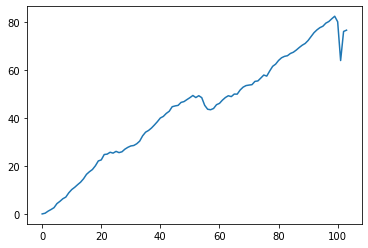

In [13]:
a = df_usa[df_usa.Variable == 'Gross domestic product, volume, market prices'].Value.reset_index().Value


weights = [0,0,0,0.15,
           0,0,0,0,
           0,0,0.07,0,
           0.1,0.1,0,0,
           0.05,0,0.2,0.05,
           0,0,0,0.27]

b = df_donor[df_donor.Variable == 'Gross domestic product, volume, market prices']

plt.plot(((a/a[0])-1)*100);

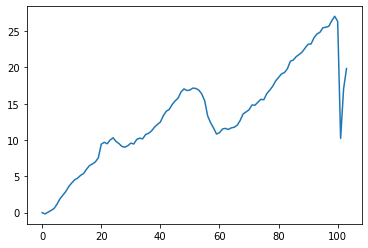

In [14]:
a = df_usa[df_usa.Variable == 'Total employment (labour force survey basis)'].Value.reset_index().Value
plt.plot(((a/a[0])-1)*100);

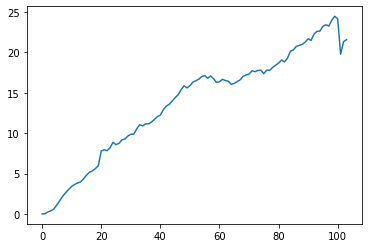

In [15]:
a = df_usa[df_usa.Variable == 'Labour force'].Value.reset_index().Value
plt.plot(((a/a[0])-1)*100);

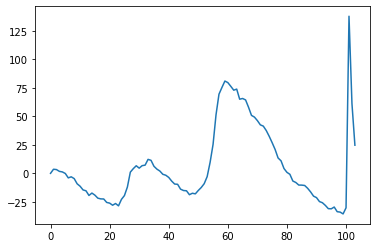

In [16]:
a = df_usa[df_usa.Variable == 'Unemployment rate'].Value.reset_index().Value
plt.plot(((a/a[0])-1)*100);

## Creating Panel Data Set

In [17]:
df_usa.drop(['LOCATION', 'VARIABLE', 'FREQUENCY', 'Frequency', 'TIME', 'Unit', 'PowerCode Code',
        'PowerCode', 'Reference Period Code', 'Reference Period', 'Flag Codes', 
         'Flags', 'Unit Code'], axis=1, inplace=True)

df_usa

,Country,Variable,Time,Value
496567,United States,Labour force,Q1-1995,1.320870e+08
496568,United States,Labour force,Q2-1995,1.321300e+08
496569,United States,Labour force,Q3-1995,1.324300e+08
496570,United States,Labour force,Q4-1995,1.326137e+08
496571,United States,Labour force,Q1-1996,1.329160e+08
...,...,...,...,...
1054462,United States,Unemployment rate,Q4-2019,3.531494e+00
1054463,United States,Unemployment rate,Q1-2020,3.824698e+00
1054464,United States,Unemployment rate,Q2-2020,1.302313e+01
1054465,United States,Unemployment rate,Q3-2020,8.831842e+00


In [18]:
s = df_usa.groupby(['Country','Time']).cumcount()

df1 = df_usa.set_index(['Country', 'Time', s]).unstack().sort_index(level=1, axis=1)
df1.columns = [f'{x}{y}' for x, y in df1.columns]
df1 = df1.reset_index()

In [19]:
df1.drop(['Variable0','Variable1','Variable2','Variable3','Variable4','Variable5',
         'Variable6', 'Variable7'], axis=1, inplace=True)

df1.rename(columns={'Value0': 'Labour force',
                   'Value1': 'Private final consumption expenditure, volume',
                   'Value2': 'Gross fixed capital formation, total, volume',
                   'Value3': 'Gross domestic product, volume, market prices',
                   'Value4': 'Total employment (labour force survey basis)',
                   'Value5': 'Imports of goods and services, volume (national accounts basis)',
                   'Value6': 'Exports of goods and services, volume (national accounts basis)',
                   'Value7': 'Unemployment rate'}, inplace=True)

In [20]:
df1

,Country,Time,Labour force,"Private final consumption expenditure, volume","Gross fixed capital formation, total, volume","Gross domestic product, volume, market prices",Total employment (labour force survey basis),"Imports of goods and services, volume (national accounts basis)","Exports of goods and services, volume (national accounts basis)",Unemployment rate
0,United States,Q1-1995,1.320870e+08,6.822519e+12,1.931397e+12,1.054364e+13,1.248487e+08,1.102003e+12,9.447600e+11,5.479974
1,United States,Q1-1996,1.329160e+08,7.057641e+12,2.025784e+12,1.081790e+13,1.255420e+08,1.167309e+12,1.025937e+12,5.547865
2,United States,Q1-1997,1.355823e+08,7.310170e+12,2.178106e+12,1.128459e+13,1.284957e+08,1.310096e+12,1.137768e+12,5.226836
3,United States,Q1-1998,1.371477e+08,7.633895e+12,2.357550e+12,1.183249e+13,1.307823e+08,1.488026e+12,1.214634e+12,4.641226
4,United States,Q1-1999,1.389000e+08,8.060776e+12,2.581660e+12,1.240329e+13,1.329433e+08,1.633882e+12,1.238297e+12,4.288457
...,...,...,...,...,...,...,...,...,...,...
99,United States,Q4-2016,1.596650e+08,1.238000e+13,3.676493e+12,1.787618e+13,1.520620e+08,3.204229e+12,2.397879e+12,4.761845
100,United States,Q4-2017,1.604753e+08,1.273374e+13,3.844638e+12,1.835943e+13,1.538563e+08,3.383204e+12,2.536238e+12,4.124621
101,United States,Q4-2018,1.627927e+08,1.303338e+13,3.983118e+12,1.881392e+13,1.566450e+08,3.486043e+12,2.548787e+12,3.776378
102,United States,Q4-2019,1.644347e+08,1.335369e+13,4.075404e+12,1.925396e+13,1.586277e+08,3.419332e+12,2.557846e+12,3.531494


# test

In [186]:
df = pd.read_csv("EO108_INTERNET-2020-1-EN-20210529T100253.csv")
freq = 'Quarterly'
time = ['Q1-1995', 'Q2-1995', 'Q3-1995', 'Q4-1995',
       'Q1-1996', 'Q2-1996', 'Q3-1996', 'Q4-1996', 'Q1-1997', 'Q2-1997',
       'Q3-1997', 'Q4-1997', 'Q1-1998', 'Q2-1998', 'Q3-1998', 'Q4-1998',
       'Q1-1999', 'Q2-1999', 'Q3-1999', 'Q4-1999', 'Q1-2000', 'Q2-2000',
       'Q3-2000', 'Q4-2000', 'Q1-2001', 'Q2-2001', 'Q3-2001', 'Q4-2001',
       'Q1-2002', 'Q2-2002', 'Q3-2002', 'Q4-2002', 'Q1-2003', 'Q2-2003',
       'Q3-2003', 'Q4-2003', 'Q1-2004', 'Q2-2004', 'Q3-2004', 'Q4-2004',
       'Q1-2005', 'Q2-2005', 'Q3-2005', 'Q4-2005', 'Q1-2006', 'Q2-2006',
       'Q3-2006', 'Q4-2006', 'Q1-2007', 'Q2-2007', 'Q3-2007', 'Q4-2007',
       'Q1-2008', 'Q2-2008', 'Q3-2008', 'Q4-2008', 'Q1-2009', 'Q2-2009',
       'Q3-2009', 'Q4-2009', 'Q1-2010', 'Q2-2010', 'Q3-2010', 'Q4-2010',
       'Q1-2011', 'Q2-2011', 'Q3-2011', 'Q4-2011', 'Q1-2012', 'Q2-2012',
       'Q3-2012', 'Q4-2012', 'Q1-2013', 'Q2-2013', 'Q3-2013', 'Q4-2013',
       'Q1-2014', 'Q2-2014', 'Q3-2014', 'Q4-2014', 'Q1-2015', 'Q2-2015',
       'Q3-2015', 'Q4-2015', 'Q1-2016', 'Q2-2016', 'Q3-2016', 'Q4-2016',
       'Q1-2017', 'Q2-2017', 'Q3-2017', 'Q4-2017', 'Q1-2018', 'Q2-2018',
       'Q3-2018', 'Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019', 'Q4-2019',
       'Q1-2020', 'Q2-2020', 'Q3-2020', 'Q4-2020']

df = df[df.Frequency == freq]
df = df[df.Time.isin(time)]

countries = ['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland', 'France', 'Germany', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'United States']

df = df[df.Country.isin(countries)]

variables = ['Gross domestic product, volume, market prices',
             'Total employment (labour force survey basis)',
             'Labour force',
             'Unemployment rate',
             'Private final consumption expenditure, volume',
             'Gross fixed capital formation, total, volume',
            'Exports of goods and services, volume (national accounts basis)',
            'Imports of goods and services, volume (national accounts basis)']

df = df[df.Variable.isin(variables)]

df.drop(['LOCATION', 'VARIABLE', 'FREQUENCY', 'Frequency', 'TIME', 'Unit', 'PowerCode Code',
        'PowerCode', 'Reference Period Code', 'Reference Period', 'Flag Codes', 
         'Flags', 'Unit Code'], axis=1, inplace=True)

s = df.groupby(['Country','Time']).cumcount()

df_final = df.set_index(['Country', 'Time', s]).unstack().sort_index(level=1, axis=1)
df_final.columns = [f'{x}{y}' for x, y in df_final.columns]
df_final = df_final.reset_index()

df_final.drop(['Variable0','Variable1','Variable2','Variable3','Variable4','Variable5',
         'Variable6', 'Variable7'], axis=1, inplace=True)

df_final.rename(columns={'Value0': 'Labour force',
                   'Value1': 'Private final consumption expenditure, volume',
                   'Value2': 'Gross fixed capital formation, total, volume',
                   'Value3': 'Gross domestic product, volume, market prices',
                   'Value4': 'Total employment (labour force survey basis)',
                   'Value5': 'Imports of goods and services, volume (national accounts basis)',
                   'Value6': 'Exports of goods and services, volume (national accounts basis)',
                   'Value7': 'Unemployment rate'}, inplace=True)


df_final['Countryno'] = pd.factorize(df_final['Country'])[0]+1
dates = []
for date in df_final.Time:
    if date[:2] == 'Q1':
        c = '.00'
    elif date[:2] == 'Q2':
        c = '.25'
    elif date[:2] == 'Q3':
        c = '.50'
    else:
        c = '.75'
    
    dates.append(float(date[-4:]+c))
    
df_final.Time = dates

df_final['Consumption % per GDP'] = df_final['Private final consumption expenditure, volume']/df_final['Gross domestic product, volume, market prices']*100
df_final['Investment % per GDP'] = df_final['Gross fixed capital formation, total, volume']/df_final['Gross domestic product, volume, market prices']*100
df_final['Net exports % per GDP'] = (df_final['Exports of goods and services, volume (national accounts basis)']-df_final['Imports of goods and services, volume (national accounts basis)'])/df_final['Gross domestic product, volume, market prices']*100
df_final['Labour productivity'] = df_final['Gross domestic product, volume, market prices']/df_final['Total employment (labour force survey basis)']

df_final.sort_values(by=['Countryno','Time'], inplace=True)
df_final.reset_index(inplace=True)

df_final.drop(columns=['index'],inplace=True)

labour_prod_growth = np.array([])
for i in np.linspace(1,25,25):
        a = df_final[df_final.Countryno==i].reset_index()['Labour productivity'].pct_change()
        labour_prod_growth = np.append(labour_prod_growth,a)
df_final['Labour productivity growth'] = labour_prod_growth*100

df_final

/var/folders/ng/83h0md1s73567d977zch9wnh0000gn/T/ipykernel_52130/3668582038.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("EO108_INTERNET-2020-1-EN-20210529T100253.csv")


,Country,Time,Labour force,"Private final consumption expenditure, volume","Gross fixed capital formation, total, volume","Gross domestic product, volume, market prices",Total employment (labour force survey basis),"Imports of goods and services, volume (national accounts basis)","Exports of goods and services, volume (national accounts basis)",Unemployment rate,Countryno,Consumption % per GDP,Investment % per GDP,Net exports % per GDP,Labour productivity,Labour productivity growth
0,Australia,1995.00,1.432336e+11,8.856843e+06,8.077377e+06,1.731215e+11,9.645291e+10,4.778329e+11,8.992788e+11,8.800723,1,0.005116,0.004666,243.439358,1.794881,NaN
1,Australia,1995.25,1.421339e+11,8.939832e+06,8.188265e+06,1.724004e+11,9.550523e+10,4.838884e+11,9.032843e+11,8.406955,1,0.005186,0.004750,243.268545,1.805141,0.571620
2,Australia,1995.50,1.493485e+11,8.969251e+06,8.222506e+06,1.714922e+11,9.579144e+10,4.852148e+11,9.240987e+11,8.325610,1,0.005230,0.004795,255.920600,1.790266,-0.824004
3,Australia,1995.75,1.495639e+11,9.020135e+06,8.267100e+06,1.739779e+11,9.752242e+10,4.906119e+11,9.248862e+11,8.348373,1,0.005185,0.004752,249.614647,1.783979,-0.351223
4,Australia,1996.00,1.578054e+11,9.040712e+06,8.280916e+06,1.777614e+11,1.005260e+11,4.949225e+11,9.401375e+11,8.404165,1,0.005086,0.004658,250.456523,1.768313,-0.878147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,United States,2019.75,1.644347e+08,1.335369e+13,4.075404e+12,1.925396e+13,1.586277e+08,3.419332e+12,2.557846e+12,3.531494,25,69.355539,21.166577,-4.474332,121378.315678,0.090786
2596,United States,2020.00,1.640217e+08,1.311841e+13,4.075494e+12,1.901085e+13,1.577483e+08,3.283110e+12,2.495099e+12,3.824698,25,69.004844,21.437729,-4.145060,120513.780389,-0.712265
2597,United States,2020.25,1.582133e+08,1.186025e+13,3.795484e+12,1.730251e+13,1.376090e+08,2.702467e+12,1.927417e+12,13.023133,25,68.546409,21.936030,-4.479408,125736.768671,4.333934
2598,United States,2020.50,1.602837e+08,1.291588e+13,4.006550e+12,1.858350e+13,1.461277e+08,3.185872e+12,2.169508e+12,8.831842,25,69.501850,21.559716,-5.469174,127173.049594,1.142292


In [192]:
df_final.to_csv('df_final.csv', index=False)